# Star Wars Fans Survey

While waiting for Star Wars: The Force Awakens to come out, the team at FiveThirtyEight became interested in answering some questions about Star Wars fans. In particular, they wondered: does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which you download from their GitHub repository.

For this project, we'll be cleaning and exploring the data set in Jupyter notebook.

In [1]:
#Read the data set into a dataframe.
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [2]:
#Explore the data looking for any strange values in the columns and rows.
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

In [3]:
#Review the column names
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [4]:
#Remove any rows where RespondentID is NaN
star_wars = star_wars[star_wars['RespondentID'].notnull()]

In [5]:
#Check to make sure there are no nulls
star_wars['RespondentID'].value_counts(dropna=False)

3.291092e+09    1
3.290345e+09    1
3.290351e+09    1
3.288558e+09    1
3.290360e+09    1
3.290365e+09    1
3.290372e+09    1
3.290375e+09    1
3.290380e+09    1
3.290387e+09    1
3.290399e+09    1
3.291392e+09    1
3.290402e+09    1
3.290409e+09    1
3.290412e+09    1
3.290418e+09    1
3.290423e+09    1
3.290347e+09    1
3.290409e+09    1
3.289920e+09    1
3.290337e+09    1
3.290266e+09    1
3.290407e+09    1
3.290280e+09    1
3.290662e+09    1
3.290287e+09    1
3.290289e+09    1
3.290296e+09    1
3.290298e+09    1
3.290305e+09    1
               ..
3.288591e+09    1
3.290655e+09    1
3.292719e+09    1
3.289446e+09    1
3.292731e+09    1
3.290597e+09    1
3.289532e+09    1
3.291023e+09    1
3.292765e+09    1
3.289986e+09    1
3.289598e+09    1
3.290651e+09    1
3.292664e+09    1
3.292654e+09    1
3.292581e+09    1
3.289553e+09    1
3.289726e+09    1
3.288640e+09    1
3.292565e+09    1
3.290639e+09    1
3.292573e+09    1
3.292583e+09    1
3.292640e+09    1
3.292587e+09    1
3.292597e+

In [6]:
#Convert the Have you seen any of the 6 films in the Star Wars franchise? column to the Boolean type

#first define the new mapping
yes_no = {
    "Yes": True,
    "No": False
}

#Call the map() function to perform the mapping
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False)

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [7]:
#Convert the Do you consider yourself to be a fan of the Star Wars film franchise?? column to the Boolean type

#first define the new mapping
yes_no = {
    "Yes": True,
    "No": False
}

#Call the map() function to perform the mapping
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [8]:
movie_columns = ['Which of the following Star Wars films have you seen? Please select all that apply.',
                 'Unnamed: 4',
                 'Unnamed: 5',
                 'Unnamed: 6',
                 'Unnamed: 7',
                 'Unnamed: 8'
                ]

def name_to_bool(s):
    if pd.notnull(s):
        return True
    elif pd.isnull(s):
        return False

for c in movie_columns:
    star_wars[c] = star_wars[c].apply(name_to_bool)
    print(star_wars[c].value_counts(dropna=False))

True     673
False    513
Name: Which of the following Star Wars films have you seen? Please select all that apply., dtype: int64
False    615
True     571
Name: Unnamed: 4, dtype: int64
False    636
True     550
Name: Unnamed: 5, dtype: int64
True     607
False    579
Name: Unnamed: 6, dtype: int64
True     758
False    428
Name: Unnamed: 7, dtype: int64
True     738
False    448
Name: Unnamed: 8, dtype: int64


In [9]:
#Rename the movie quesition columns
star_wars = star_wars.rename(columns={
    "Which of the following Star Wars films have you seen? Please select all that apply.": "Seen_1",
    "Unnamed: 4":"Seen_2",
    "Unnamed: 5":"Seen_3",
    "Unnamed: 6":"Seen_4",
    "Unnamed: 7":"Seen_5",
    "Unnamed: 8":"Seen_6"
    
})

star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Seen_1', 'Seen_2', 'Seen_3', 'Seen_4', 'Seen_5', 'Seen_6',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦',
       'Do 

The columns now have intuitive names, along with True and False values that indicate whether the respondent saw each of the six Star Wars movies.

The next six columns ask the respondent to rank the Star Wars movies in order of least favorite to most favorite. 1 means the film was the most favorite, and 6 means it was the least favorite. Each of the following columns can contain the value 1, 2, 3, 4, 5, 6, or NaN.

Fortunately, these columns don't require a lot of cleanup. We'll need to convert each column to a numeric type, though, then rename the columns so that we can tell what they represent more easily.

In [10]:
#Convert each of the columns above to a float type
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [11]:
#Rename the above columns
star_wars = star_wars.rename(columns={
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "Ranking_1",
    "Unnamed: 10":"Ranking_2",
    "Unnamed: 11":"Ranking_3",
    "Unnamed: 12":"Ranking_4",
    "Unnamed: 13":"Ranking_5",
    "Unnamed: 14":"Ranking_6"
    
})

star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Seen_1', 'Seen_2', 'Seen_3', 'Seen_4', 'Seen_5', 'Seen_6', 'Ranking_1',
       'Ranking_2', 'Ranking_3', 'Ranking_4', 'Ranking_5', 'Ranking_6',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gender', 'Age', 'Household Income', 'Education',
       'Location (Census Region)'],

Now that we've cleaned up the ranking columns, we can find the highest-ranked movie more quickly. To do this, take the mean of each of the ranking columns using the pandas.DataFrame.mean() method on dataframes.

In [12]:
mean_scores = star_wars[['Ranking_1', 'Ranking_2', 'Ranking_3', 'Ranking_4', 'Ranking_5', 'Ranking_6']].mean()
mean_scores

Ranking_1    3.732934
Ranking_2    4.087321
Ranking_3    4.341317
Ranking_4    3.272727
Ranking_5    2.513158
Ranking_6    3.047847
dtype: float64

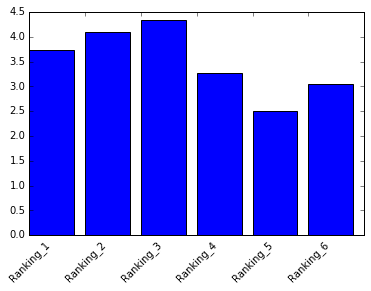

In [13]:
#Make a bar chart of each ranking. 
import matplotlib.pyplot as plt
%matplotlib inline 
fig, ax = plt.subplots()
ax.bar(range(len(mean_scores)),mean_scores)
ax.set_xticklabels(mean_scores.index)
plt.xticks(rotation=45)
plt.show()

As we see in the above bar chart Ranking 5 received the lowest average rating, meaning it was on average ranked \#1 for all of the Star Wars Movies. This movie correlates to "Star Wars: Episode V The Empire Strikes Back"

In [17]:
#Earlier in this project, we cleaned up the seen columns and converted their values to the Boolean type
#Let's figure out how many people have seen each movie just by taking the sum of the column

seen_cols = [col for col in star_wars.columns if 'Seen' in col]
seen_sums = star_wars[seen_cols].sum()
seen_sums

Seen_1    673
Seen_2    571
Seen_3    550
Seen_4    607
Seen_5    758
Seen_6    738
dtype: int64

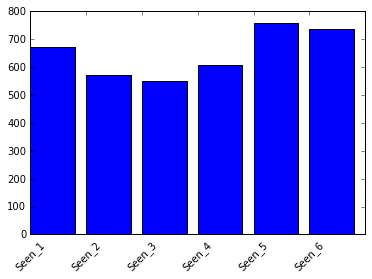

In [18]:
#Make a bar chart of each seen. 
fig, ax = plt.subplots()
ax.bar(range(len(seen_sums)),seen_sums)
ax.set_xticklabels(seen_sums.index)
plt.xticks(rotation=45)
plt.show()

The above graph reveals that movie \#5 was the most seen, followed by movie \#6. This is "Star Wars: Episode V The Empire Strikes Back" and "Star Wars: Episode VI Return of the Jedi", respectively. Interestingly the scores do not seem to correlate with the rankings. We might guess that these were the most popular because they were the 2nd and 3rd Star Wars movies that were produced; possibly after the first movie Star Wars became popular and people wanted to see what the hype was about in the following movies. Then the hype died down a little bit after the third movie.

In [23]:
male_seen = star_wars[star_wars['Gender'] == 'Male'][[col for col in star_wars.columns if 'Seen' in col]].sum()
female_seen = star_wars[star_wars['Gender'] == 'Female'][[col for col in star_wars.columns if 'Seen' in col]].sum()

male_ranking = star_wars[star_wars['Gender'] == 'Male'][['Ranking_1', 'Ranking_2', 'Ranking_3', 'Ranking_4', 'Ranking_5', 'Ranking_6']].mean()
female_ranking = star_wars[star_wars['Gender'] == 'Female'][['Ranking_1', 'Ranking_2', 'Ranking_3', 'Ranking_4', 'Ranking_5', 'Ranking_6']].mean()

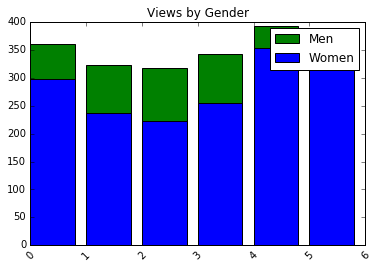

In [30]:
#Make a bar chart of male vs female. 
fig, ax = plt.subplots()
p1 = ax.bar(range(len(male_seen)),male_seen, color='green')
p2 = ax.bar(range(len(female_seen)),female_seen)
#ax.set_xticklabels(seen_sums.index)
plt.legend((p1[0], p2[0]), ('Men', 'Women'))
plt.title('Views by Gender')
plt.xticks(rotation=45)
plt.show()

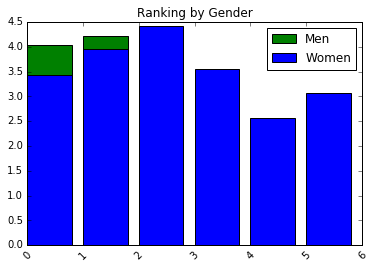

In [29]:
#Make a bar chart of male vs female. 
fig, ax = plt.subplots()
p1 = ax.bar(range(len(male_ranking)),male_ranking, color='green')
p2 = ax.bar(range(len(female_ranking)),female_ranking)
#ax.set_xticklabels(seen_sums.index)
plt.legend((p1[0], p2[0]), ('Men', 'Women'))
plt.xticks(rotation=45)
plt.title("Ranking by Gender")
plt.show()

From the above two plots we see that more men than women, on average, viewed the Star Wars films. However, men and women by-and-large gave the movies the same rankings.

That is where I will end this analysis. Future studies in this dataset could include:

- Try to segment the data based on columns like Education, - Location (Census Region), and Which character shot first?, which aren't binary. Are they any interesting patterns?
- Clean up columns 15 to 29, which contain data on the characters respondents view favorably and unfavorably.
- Which character do respondents like the most?
- Which character do respondents dislike the most?
- Which character is the most controversial (split between likes and dislikes)?